In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#https://www.kaggle.com/datasets/arunavakrchakraborty/covid19-twitter-dataset?select=Covid-19+Twitter+Dataset+%28Aug-Sep+2020%29.csv
import pandas as pd
df=pd.read_csv('/content/drive/MyDrive/Covid19/Covid-19(Apr-Jun 2020).csv')
df = df.drop_duplicates()


In [1]:
import pandas as pd

covid_keywords = {"covid", "covid19", "coronavirus", "pandemic", "lockdown",
                  "quarantine", "mask", "wuhan", "vaccine", "vaccination",
                  "socialdistancing", "stayhome"}

def contains_covid_keywords(text, keywords):
    if pd.isna(text):
        return False
    return any(keyword in text.lower() for keyword in keywords)

file_paths = [
    ("Apr-jun 2020", "/content/drive/MyDrive/Covid19/Covid-19(Apr-Jun 2020).csv"),
]

for month, file_path in file_paths:
    try:
        df = pd.read_csv(file_path)

        if 'original_text' in df.columns and 'hashtags' in df.columns:

            filtered_df = df[df['original_text'].notna() & df['hashtags'].notna() & (
                df['original_text'].apply(lambda x: contains_covid_keywords(str(x), covid_keywords)) |
                df['hashtags'].apply(lambda x: contains_covid_keywords(str(x), covid_keywords))
            )]

            print(f"Filtered data for {month}:")
            print(filtered_df.head())

            filtered_df.to_csv(f"filtered_{month}.csv", index=False)

        else:
            print(f"Missing necessary columns in the dataset for {month}.")

    except Exception as e:
        print(f"Error processing file {file_path}: {e}")


Filtered data for Apr-jun 2020:
              id  created_at  \
4   1.250000e+18  2020-04-19   
7   1.250000e+18  2020-04-19   
13  1.250000e+18  2020-04-19   
16  1.250000e+18  2020-04-19   
21  1.250000e+18  2020-04-19   

                                               source  \
4   <a href="http://twitter.com/download/android" ...   
7   <a href="http://twitter.com/download/iphone" r...   
13  <a href="http://twitter.com/download/iphone" r...   
16  <a href="http://twitter.com/download/android" ...   
21  <a href="http://twitter.com/download/iphone" r...   

                                        original_text lang  favorite_count  \
4   My Condolences to the Family of those who did ...   en             0.0   
7   RT @morethanmySLE: BREAKING: A New York woman ...   en             0.0   
13  RT @ClevelandClinic: Prevention is key. Know t...   en             0.0   
16  RT @OIC_IPHRC: 1/2 #OIC-IPHRC condemns the unr...   en             0.0   
21  RT @aplusk: Mila and I are launching Q

In [2]:
df=filtered_df

In [ ]:
df.tail()

,id,created_at,source,original_text,lang,favorite_count,retweet_count,original_author,hashtags,user_mentions,place,clean_tweet,compound,neg,neu,pos,sentiment
143845,1.270000e+18,2020-06-20,"<a href=""http://twitter.com/download/iphone"" r...",RT @VoteGloriaJ: These are the House members (...,en,0.0,147499.0,rachel_w,RememberinNovember,VoteGloriaJ,"Johnson City, TN",hous member vote aye deni scienc believ covid1...,-0.2732,0.189,0.811,0.000,neg
143862,1.270000e+18,2020-06-20,"<a href=""http://twitter.com/download/iphone"" r...",RT @ace_national: Throughout the Covid-19 emer...,en,0.0,147522.0,GabrielleMoleta,nationallottery,ace_national,"Kent, UK",throughout covid19 emerg artist creator suppor...,0.4019,0.000,0.722,0.278,pos
143869,1.270000e+18,2020-06-20,"<a href=""https://mobile.twitter.com"" rel=""nofo...",6 members of US President @realDonaldTrump's c...,en,0.0,7437.0,Jerusalem_Post,coronavirus,realDonaldTrump,Israel,member presid campaign staff test posit ahead ...,0.0000,0.000,1.000,0.000,neu
143887,1.270000e+18,2020-06-20,"<a href=""https://www.hootsuite.com"" rel=""nofol...",How is #COVID19 changing elections? Download o...,en,0.0,74.0,NCSLorg,COVID19,NCSLorg,"Denver, CO | Washington, DC",chang elect download latest legisbrief,0.0000,0.000,1.000,0.000,neu
143899,1.270000e+18,2020-06-20,"<a href=""http://twitter.com/download/android"" ...",RT @gemmaod1: Apologies for any fear or anxiet...,en,0.0,1.0,twilouhom,Covid_19,gemmaod1,"London, England",apolog fear anxieti caus claim surviv rate acq...,-0.4939,0.286,0.714,0.000,neg


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22784 entries, 4 to 143899
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   id               22784 non-null  float64       
 1   created_at       22784 non-null  datetime64[ns]
 2   source           22776 non-null  object        
 3   original_text    22784 non-null  object        
 4   lang             22784 non-null  object        
 5   favorite_count   22784 non-null  float64       
 6   retweet_count    22784 non-null  float64       
 7   original_author  22784 non-null  object        
 8   hashtags         22784 non-null  object        
 9   user_mentions    16571 non-null  object        
 10  place            16961 non-null  object        
 11  clean_tweet      22749 non-null  object        
 12  compound         22784 non-null  float64       
 13  neg              22784 non-null  float64       
 14  neu              22784 non-null  float64  

In [3]:

import torch
import matplotlib.pyplot as plt
import pandas as pd
from gluonts.dataset.pandas import PandasDataset
from gluonts.dataset.split import split

from uni2ts.eval_util.plot import plot_single
from uni2ts.model.moirai import MoiraiForecast, MoiraiModule
import numpy as np

In [4]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df = df.dropna(subset=['created_at'])
df = df.set_index('created_at')

ts_df = df.resample('D').size().to_frame(name='target')
from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# ts_df['target'] = scaler.fit_transform(ts_df[['target']])
dataset_df=ts_df.copy()
dataset_df = dataset_df.reset_index()

dataset_df['unique_id'] = 1

# Final DataFrame
print(dataset_df.info())

dataset = PandasDataset(ts_df[['target']])
# Remember to inverse transform the predictions after forecast

from gluonts.dataset.pandas import PandasDataset
dataset = PandasDataset(ts_df)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   created_at  63 non-null     datetime64[ns]
 1   target      63 non-null     int64         
 2   unique_id   63 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 1.6 KB
None


In [ ]:
!pip install -U torch==2.3.1
!pip install torchvision==0.17.2

In [ ]:
!pip install gluonts uni2ts

In [5]:
test_size = 63
horizon = 7

# Step 1: Split the dataset
train, test_template = split(dataset, offset=-test_size)

test_data = test_template.generate_instances(
    prediction_length=horizon,
    windows=test_size // horizon,  # 9 windows
    distance=horizon
)

# Step 2: Load the Moirai model
model = MoiraiForecast(
    module=MoiraiModule.from_pretrained(f"Salesforce/moirai-1.0-R-large"),
    prediction_length=horizon,
    context_length=400,
    patch_size="auto",
    num_samples=400,
    target_dim=1,
    feat_dynamic_real_dim=dataset.num_feat_dynamic_real,
    past_feat_dynamic_real_dim=dataset.num_past_feat_dynamic_real,
)

predictor = model.create_predictor(batch_size=8)
forecasts = list(predictor.predict(test_data.input))


# Step 3: Define helper function to get median and confidence intervals
def get_median_and_ci(data, horizon, id, confidence=0.85):
    n_samples, n_timesteps = data.shape
    medians = np.median(data, axis=0)
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    lower_bounds = np.percentile(data, lower_percentile, axis=0)
    upper_bounds = np.percentile(data, upper_percentile, axis=0)

    return pd.DataFrame({
        'unique_id': id,
        'Moirai': medians,
        f'Moirai-lo-{int(confidence*100)}': lower_bounds,
        f'Moirai-hi-{int(confidence*100)}': upper_bounds
    })


# Step 4: Process each forecast
moirai_preds = [
    get_median_and_ci(data=forecasts[i].samples, horizon=horizon, id=i)
    for i in range(len(forecasts))  # should be 9 for test_size=63 and horizon=7
]

moirai_preds_df = pd.concat(moirai_preds, axis=0, ignore_index=True)



dataset_df['created_at'] = pd.to_datetime(dataset_df['created_at'])
dataset_df = dataset_df.sort_values('created_at')

# Get the last `test_size` rows
test_targets = dataset_df['target'].values[-test_size:]
test_dates = dataset_df['created_at'].values[-test_size:]

# Create rolling windows
target_windows = [
    test_targets[i * horizon: (i + 1) * horizon]
    for i in range(test_size // horizon)
]
date_windows = [
    test_dates[i * horizon: (i + 1) * horizon]
    for i in range(test_size // horizon)
]

# Flatten and attach
moirai_preds_df['target'] = np.concatenate(target_windows)
moirai_preds_df['created_at'] = np.concatenate(date_windows)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [8]:
moirai_preds_df

,unique_id,Moirai,Moirai-lo-85,Moirai-hi-85,target,created_at
0,0,0.002138,-0.000684,0.015811,41,2020-04-19
1,0,0.000712,-0.002439,0.025527,0,2020-04-20
2,0,0.000430,-0.001295,0.018974,0,2020-04-21
3,0,0.002637,-0.000837,0.025298,105,2020-04-22
4,0,0.000367,-0.004249,0.026102,14,2020-04-23
...,...,...,...,...,...,...
58,8,158.546921,12.972412,456.059649,0,2020-06-16
59,8,168.820175,36.818295,485.080420,163,2020-06-17
60,8,176.993256,28.984621,617.568987,0,2020-06-18
61,8,213.861023,54.707282,668.138702,93,2020-06-19


In [6]:
target_filtered = moirai_preds_df['target'].where(moirai_preds_df['created_at'] <= '2020-06-08')


<ipython-input-7-4019b1d67a71>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  breakouts = target_filtered[moirai_preds_df['breakout']]


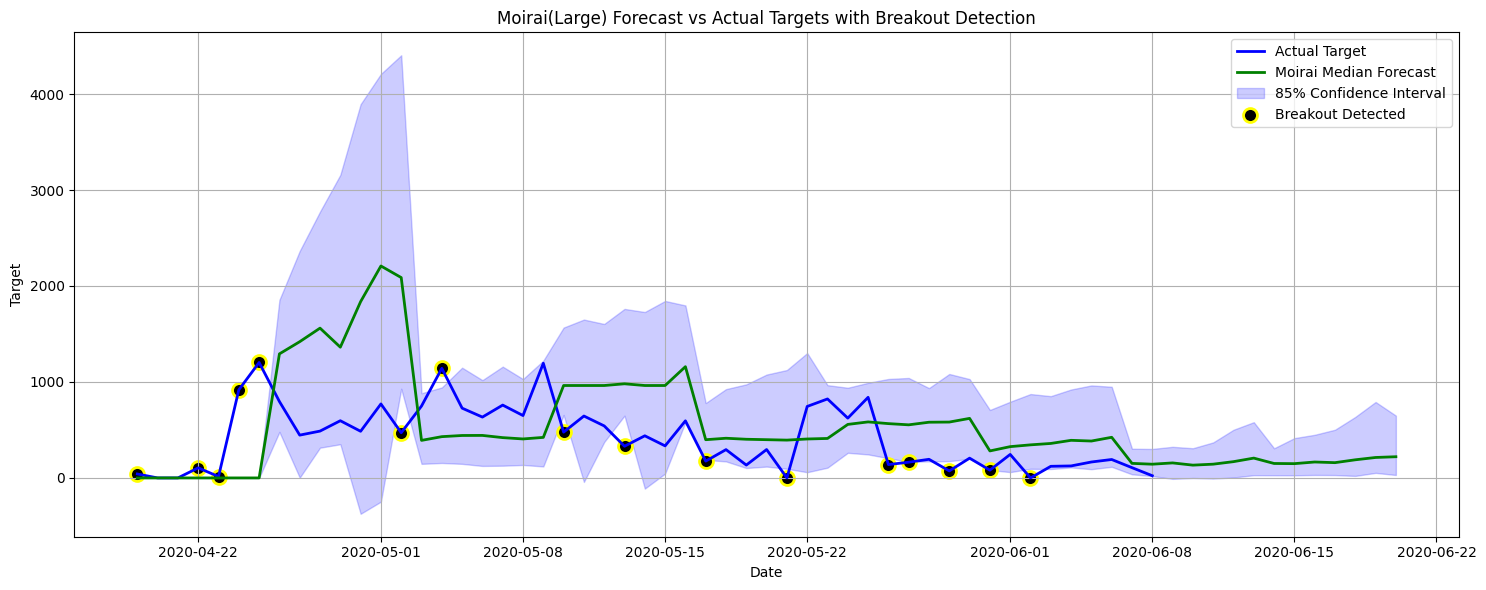

Detected Breakouts:
   created_at  target  Moirai-lo-85  Moirai-hi-85
0  2020-04-19      41     -0.000738      0.018974
3  2020-04-22     105     -0.000647      0.020404
4  2020-04-23      14     -0.004248      0.024906
5  2020-04-24     918     -0.002328      0.033736
6  2020-04-25    1203     -0.001203      0.022373
13 2020-05-02     471    929.095810   4404.490723
15 2020-05-04    1142    155.821597    942.852199
21 2020-05-10     477    655.395166   1566.661066
24 2020-05-13     330    648.794180   1761.304776
28 2020-05-17     175    187.780828    780.380501
32 2020-05-21       0     95.626008   1124.419107
37 2020-05-26     139    205.584993   1031.190240
38 2020-05-27     164    167.941553   1041.640765
40 2020-05-29      73    174.963898   1083.168134
42 2020-05-31      81     82.763394    708.198151
44 2020-06-02       0     95.013804    874.129410


In [7]:
import matplotlib.pyplot as plt

moirai_preds_df['created_at'] = pd.to_datetime(moirai_preds_df['created_at'])
moirai_preds_df = moirai_preds_df.sort_values('created_at')

moirai_preds_df['breakout'] = (
    (moirai_preds_df['target'] > moirai_preds_df['Moirai-hi-85']) |
    (moirai_preds_df['target'] < moirai_preds_df['Moirai-lo-85'])
)

cutoff_date = pd.to_datetime('2020-06-08')
target_filtered = moirai_preds_df[moirai_preds_df['created_at'] <= cutoff_date]

plt.figure(figsize=(15, 6))

plt.plot(target_filtered['created_at'], target_filtered['target'], label='Actual Target', color='blue', linewidth=2)

plt.plot(moirai_preds_df['created_at'], moirai_preds_df['Moirai'], label='Moirai Median Forecast', color='green', linewidth=2)

plt.fill_between(
    moirai_preds_df['created_at'],
    moirai_preds_df['Moirai-lo-85'],
    moirai_preds_df['Moirai-hi-85'],
    color='blue',
    alpha=0.2,
    label='85% Confidence Interval'
)

breakouts = target_filtered[moirai_preds_df['breakout']]
plt.scatter(
    breakouts['created_at'], breakouts['target'],
    color='black', s=100, edgecolors='yellow', linewidth=2,
    label='Breakout Detected'
)

plt.title("Moirai(Large) Forecast vs Actual Targets with Breakout Detection")
plt.xlabel("Date")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Detected Breakouts:")
print(breakouts[['created_at', 'target', 'Moirai-lo-85', 'Moirai-hi-85']])


In [ ]:
moirai_preds_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63 entries, 0 to 62
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   unique_id     63 non-null     int64         
 1   Moirai        63 non-null     float32       
 2   Moirai-lo-85  63 non-null     float64       
 3   Moirai-hi-85  63 non-null     float64       
 4   target        63 non-null     int64         
 5   created_at    63 non-null     datetime64[ns]
 6   breakout      63 non-null     bool          
 7   ds            63 non-null     datetime64[ns]
 8   y             63 non-null     int64         
dtypes: bool(1), datetime64[ns](2), float32(1), float64(2), int64(3)
memory usage: 3.9 KB


In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have your actual values in `y_true` and predicted values in `y_pred`
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_true = moirai_preds_df['target']  # Actual target values
y_pred = moirai_preds_df['Moirai']  # Predicted target values from Moirai

# MSE Calculation
mse = mean_squared_error(y_true, y_pred)

# RMSE Calculation
rmse = np.sqrt(mse)

# MAE Calculation
mae = mean_absolute_error(y_true, y_pred)

# Print Results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 274302.875
Root Mean Squared Error (RMSE): 523.7393197001729
Mean Absolute Error (MAE): 371.69342041015625


## Small Model

In [5]:
test_size = 63
horizon = 7

# Step 1: Split the dataset
train, test_template = split(dataset, offset=-test_size)

test_data = test_template.generate_instances(
    prediction_length=horizon,
    windows=test_size // horizon,  # 9 windows
    distance=horizon
)

# Step 2: Load the Moirai model
model = MoiraiForecast(
    module=MoiraiModule.from_pretrained(f"Salesforce/moirai-1.0-R-small"),
    prediction_length=horizon,
    context_length=400,
    patch_size="auto",
    num_samples=400,
    target_dim=1,
    feat_dynamic_real_dim=dataset.num_feat_dynamic_real,
    past_feat_dynamic_real_dim=dataset.num_past_feat_dynamic_real,
)

predictor = model.create_predictor(batch_size=8)
forecasts = list(predictor.predict(test_data.input))


# Step 3: Define helper function to get median and confidence intervals
def get_median_and_ci(data, horizon, id, confidence=0.85):
    n_samples, n_timesteps = data.shape
    medians = np.median(data, axis=0)
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    lower_bounds = np.percentile(data, lower_percentile, axis=0)
    upper_bounds = np.percentile(data, upper_percentile, axis=0)

    return pd.DataFrame({
        'unique_id': id,
        'Moirai': medians,
        f'Moirai-lo-{int(confidence*100)}': lower_bounds,
        f'Moirai-hi-{int(confidence*100)}': upper_bounds
    })


# Step 4: Process each forecast
moirai_preds = [
    get_median_and_ci(data=forecasts[i].samples, horizon=horizon, id=i)
    for i in range(len(forecasts))  # should be 9 for test_size=63 and horizon=7
]

moirai_preds_df = pd.concat(moirai_preds, axis=0, ignore_index=True)



dataset_df['created_at'] = pd.to_datetime(dataset_df['created_at'])
dataset_df = dataset_df.sort_values('created_at')

# Get the last `test_size` rows
test_targets = dataset_df['target'].values[-test_size:]
test_dates = dataset_df['created_at'].values[-test_size:]

# Create rolling windows
target_windows = [
    test_targets[i * horizon: (i + 1) * horizon]
    for i in range(test_size // horizon)
]
date_windows = [
    test_dates[i * horizon: (i + 1) * horizon]
    for i in range(test_size // horizon)
]

# Flatten and attach
moirai_preds_df['target'] = np.concatenate(target_windows)
moirai_preds_df['created_at'] = np.concatenate(date_windows)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [6]:
target_filtered = moirai_preds_df['target'].where(moirai_preds_df['created_at'] <= '2020-06-08')


<ipython-input-7-abf79b591fcc>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  breakouts = target_filtered[moirai_preds_df['breakout']]


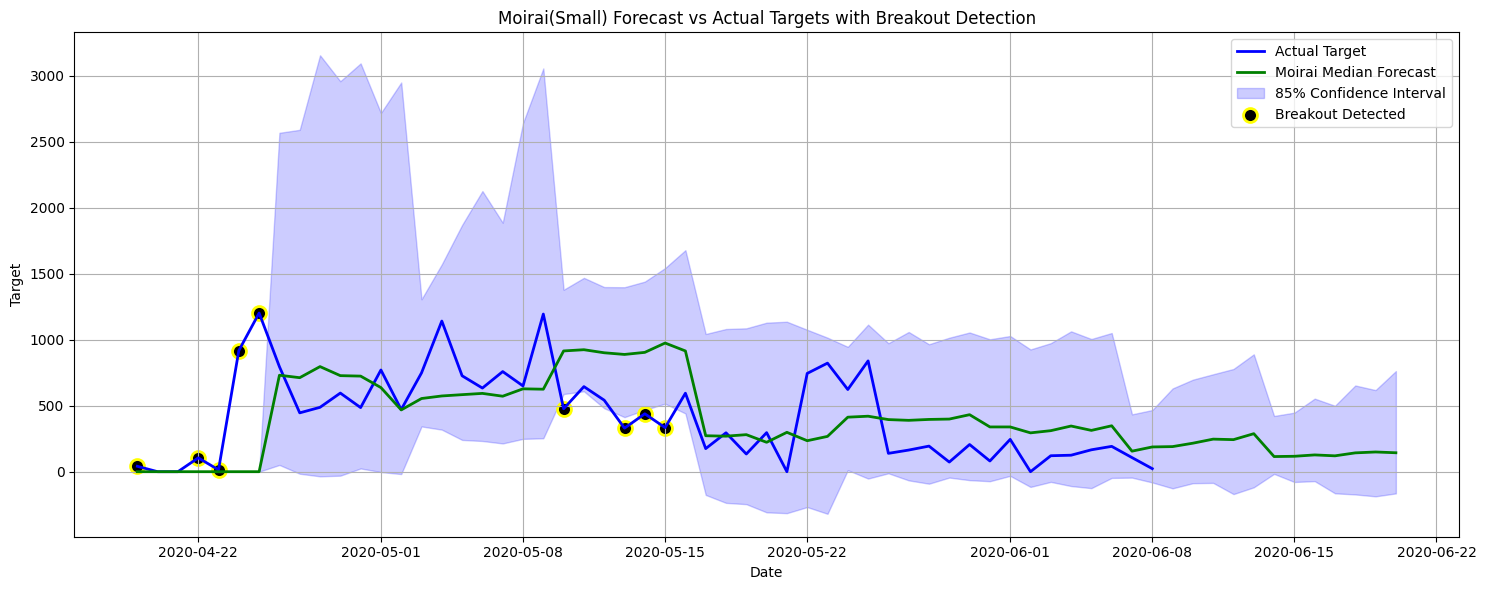

Detected Breakouts:
   created_at  target  Moirai-lo-85  Moirai-hi-85
0  2020-04-19      41     -0.007105      0.031623
3  2020-04-22     105     -0.007939      0.038183
4  2020-04-23      14     -0.006288      0.041110
5  2020-04-24     918     -0.006962      0.042476
6  2020-04-25    1203     -0.008524      0.044272
21 2020-05-10     477    588.690977   1379.089627
24 2020-05-13     330    413.614437   1398.398004
25 2020-05-14     439    468.316312   1440.854578
26 2020-05-15     334    515.770079   1543.672833


In [7]:
import matplotlib.pyplot as plt

moirai_preds_df['created_at'] = pd.to_datetime(moirai_preds_df['created_at'])
moirai_preds_df = moirai_preds_df.sort_values('created_at')

moirai_preds_df['breakout'] = (
    (moirai_preds_df['target'] > moirai_preds_df['Moirai-hi-85']) |
    (moirai_preds_df['target'] < moirai_preds_df['Moirai-lo-85'])
)

cutoff_date = pd.to_datetime('2020-06-08')
target_filtered = moirai_preds_df[moirai_preds_df['created_at'] <= cutoff_date]

plt.figure(figsize=(15, 6))

plt.plot(target_filtered['created_at'], target_filtered['target'], label='Actual Target', color='blue', linewidth=2)

plt.plot(moirai_preds_df['created_at'], moirai_preds_df['Moirai'], label='Moirai Median Forecast', color='green', linewidth=2)

plt.fill_between(
    moirai_preds_df['created_at'],
    moirai_preds_df['Moirai-lo-85'],
    moirai_preds_df['Moirai-hi-85'],
    color='blue',
    alpha=0.2,
    label='85% Confidence Interval'
)

breakouts = target_filtered[moirai_preds_df['breakout']]
plt.scatter(
    breakouts['created_at'], breakouts['target'],
    color='black', s=100, edgecolors='yellow', linewidth=2,
    label='Breakout Detected'
)

plt.title("Moirai(Small) Forecast vs Actual Targets with Breakout Detection")
plt.xlabel("Date")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Detected Breakouts:")
print(breakouts[['created_at', 'target', 'Moirai-lo-85', 'Moirai-hi-85']])


In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have your actual values in `y_true` and predicted values in `y_pred`
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_true = moirai_preds_df['target']  # Actual target values
y_pred = moirai_preds_df['Moirai']  # Predicted target values from Moirai

# MSE Calculation
mse = mean_squared_error(y_true, y_pred)

# RMSE Calculation
rmse = np.sqrt(mse)

# MAE Calculation
mae = mean_absolute_error(y_true, y_pred)

# Print Results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 101280.265625
Root Mean Squared Error (RMSE): 318.2456058219815
Mean Absolute Error (MAE): 224.5425567626953


## Base Model

In [5]:
test_size = 63
horizon = 7

# Step 1: Split the dataset
train, test_template = split(dataset, offset=-test_size)

test_data = test_template.generate_instances(
    prediction_length=horizon,
    windows=test_size // horizon,  # 9 windows
    distance=horizon
)

# Step 2: Load the Moirai model
model = MoiraiForecast(
    module=MoiraiModule.from_pretrained(f"Salesforce/moirai-1.0-R-base"),
    prediction_length=horizon,
    context_length=400,
    patch_size="auto",
    num_samples=400,
    target_dim=1,
    feat_dynamic_real_dim=dataset.num_feat_dynamic_real,
    past_feat_dynamic_real_dim=dataset.num_past_feat_dynamic_real,
)

predictor = model.create_predictor(batch_size=8)
forecasts = list(predictor.predict(test_data.input))


# Step 3: Define helper function to get median and confidence intervals
def get_median_and_ci(data, horizon, id, confidence=0.85):
    n_samples, n_timesteps = data.shape
    medians = np.median(data, axis=0)
    lower_percentile = (1 - confidence) / 2 * 100
    upper_percentile = (1 + confidence) / 2 * 100
    lower_bounds = np.percentile(data, lower_percentile, axis=0)
    upper_bounds = np.percentile(data, upper_percentile, axis=0)

    return pd.DataFrame({
        'unique_id': id,
        'Moirai': medians,
        f'Moirai-lo-{int(confidence*100)}': lower_bounds,
        f'Moirai-hi-{int(confidence*100)}': upper_bounds
    })


# Step 4: Process each forecast
moirai_preds = [
    get_median_and_ci(data=forecasts[i].samples, horizon=horizon, id=i)
    for i in range(len(forecasts))  # should be 9 for test_size=63 and horizon=7
]

moirai_preds_df = pd.concat(moirai_preds, axis=0, ignore_index=True)



dataset_df['created_at'] = pd.to_datetime(dataset_df['created_at'])
dataset_df = dataset_df.sort_values('created_at')

# Get the last `test_size` rows
test_targets = dataset_df['target'].values[-test_size:]
test_dates = dataset_df['created_at'].values[-test_size:]

# Create rolling windows
target_windows = [
    test_targets[i * horizon: (i + 1) * horizon]
    for i in range(test_size // horizon)
]
date_windows = [
    test_dates[i * horizon: (i + 1) * horizon]
    for i in range(test_size // horizon)
]

# Flatten and attach
moirai_preds_df['target'] = np.concatenate(target_windows)
moirai_preds_df['created_at'] = np.concatenate(date_windows)


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


In [6]:
target_filtered = moirai_preds_df['target'].where(moirai_preds_df['created_at'] <= '2020-06-08')


<ipython-input-7-d54a8121802c>:29: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  breakouts = target_filtered[moirai_preds_df['breakout']]


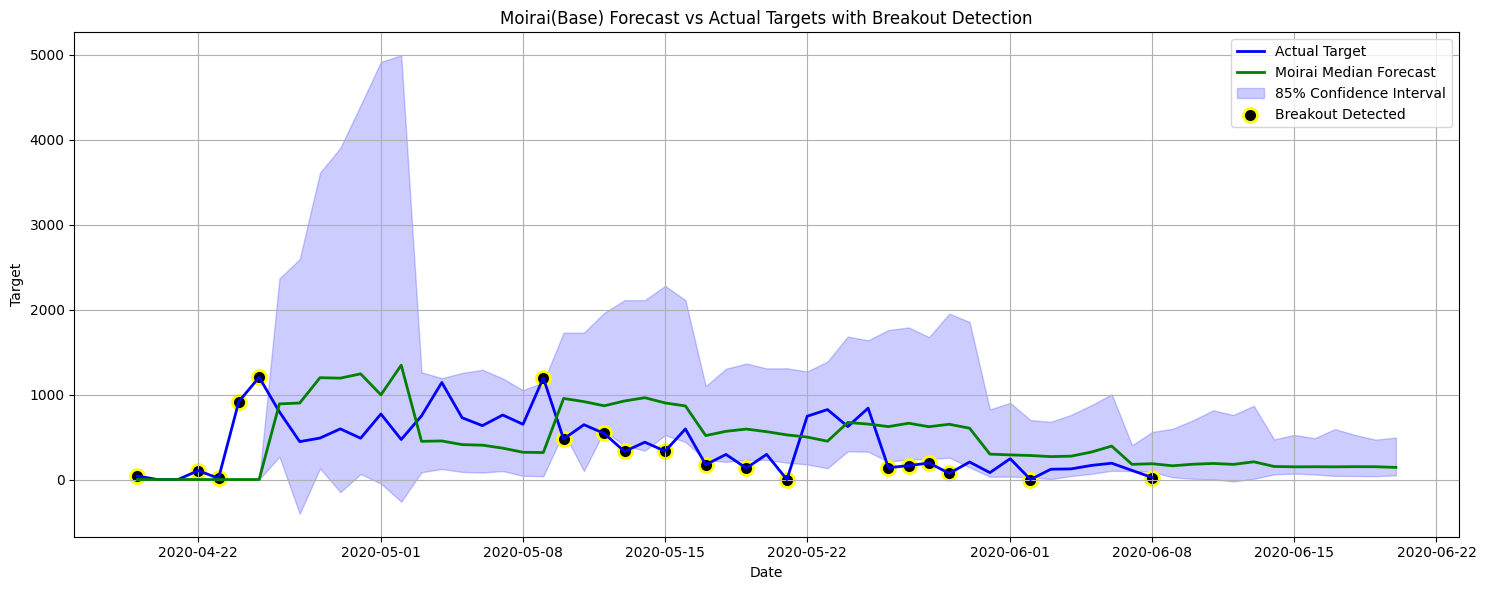

Detected Breakouts:
   created_at  target  Moirai-lo-85  Moirai-hi-85
0  2020-04-19      41     -0.002630      0.012649
3  2020-04-22     105     -0.002056      0.013331
4  2020-04-23      14     -0.002054      0.012649
5  2020-04-24     918     -0.002308      0.017284
6  2020-04-25    1203     -0.002468      0.010634
20 2020-05-09    1195     39.237210   1144.049817
21 2020-05-10     477    555.310747   1728.057251
23 2020-05-12     542    570.461369   1961.281027
24 2020-05-13     330    399.435600   2110.568359
26 2020-05-15     334    521.842171   2278.971259
28 2020-05-17     175    231.112801   1098.418970
30 2020-05-19     134    230.277269   1365.463486
32 2020-05-21       0    198.169308   1309.043964
37 2020-05-26     139    209.424445   1759.241132
38 2020-05-27     164    238.764799   1789.484579
39 2020-05-28     194    239.154886   1674.984473
40 2020-05-29      73    257.948540   1952.223230
44 2020-06-02       0     26.761566    699.314648
50 2020-06-08      23     90.9

In [7]:
import matplotlib.pyplot as plt

moirai_preds_df['created_at'] = pd.to_datetime(moirai_preds_df['created_at'])
moirai_preds_df = moirai_preds_df.sort_values('created_at')

moirai_preds_df['breakout'] = (
    (moirai_preds_df['target'] > moirai_preds_df['Moirai-hi-85']) |
    (moirai_preds_df['target'] < moirai_preds_df['Moirai-lo-85'])
)

cutoff_date = pd.to_datetime('2020-06-08')
target_filtered = moirai_preds_df[moirai_preds_df['created_at'] <= cutoff_date]

plt.figure(figsize=(15, 6))

plt.plot(target_filtered['created_at'], target_filtered['target'], label='Actual Target', color='blue', linewidth=2)

plt.plot(moirai_preds_df['created_at'], moirai_preds_df['Moirai'], label='Moirai Median Forecast', color='green', linewidth=2)

plt.fill_between(
    moirai_preds_df['created_at'],
    moirai_preds_df['Moirai-lo-85'],
    moirai_preds_df['Moirai-hi-85'],
    color='blue',
    alpha=0.2,
    label='85% Confidence Interval'
)

breakouts = target_filtered[moirai_preds_df['breakout']]
plt.scatter(
    breakouts['created_at'], breakouts['target'],
    color='black', s=100, edgecolors='yellow', linewidth=2,
    label='Breakout Detected'
)

plt.title("Moirai(Base) Forecast vs Actual Targets with Breakout Detection")
plt.xlabel("Date")
plt.ylabel("Target")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

print("Detected Breakouts:")
print(breakouts[['created_at', 'target', 'Moirai-lo-85', 'Moirai-hi-85']])


In [8]:
from sklearn.metrics import mean_squared_error
import numpy as np

# Assuming you have your actual values in `y_true` and predicted values in `y_pred`
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

y_true = moirai_preds_df['target']  # Actual target values
y_pred = moirai_preds_df['Moirai']  # Predicted target values from Moirai

# MSE Calculation
mse = mean_squared_error(y_true, y_pred)

# RMSE Calculation
rmse = np.sqrt(mse)

# MAE Calculation
mae = mean_absolute_error(y_true, y_pred)

# Print Results
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"Mean Absolute Error (MAE): {mae}")


Mean Squared Error (MSE): 165421.140625
Root Mean Squared Error (RMSE): 406.71997814835703
Mean Absolute Error (MAE): 307.2392272949219


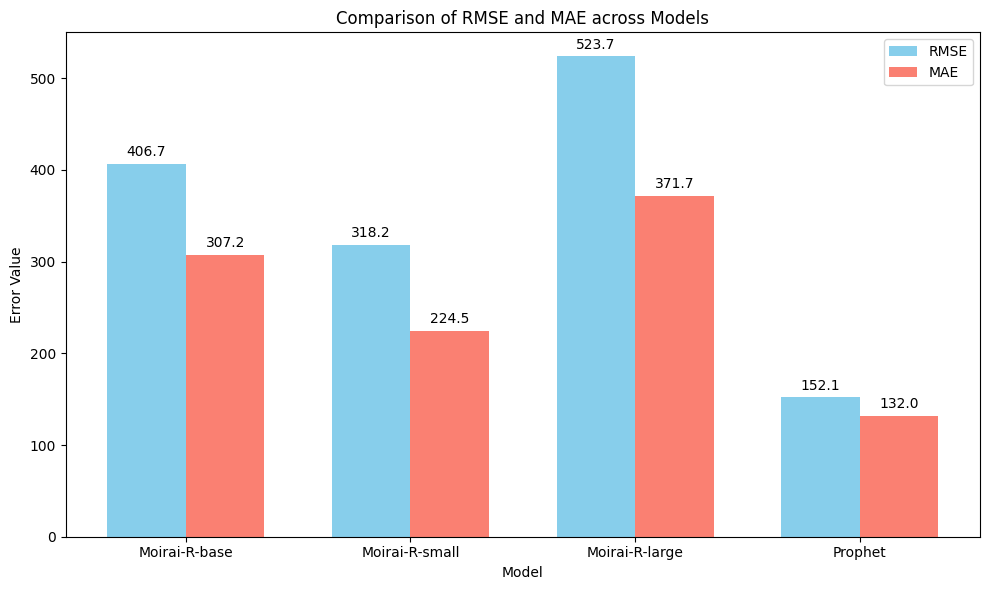

In [9]:
import matplotlib.pyplot as plt

# Define models and their error metrics
models = [
    "Moirai-R-base",
    "Moirai-R-small",
    "Moirai-R-large",
    "Prophet"
]

rmse_values = [
    406.71,  # Moirai-R-base
    318.24,  # Moirai-R-small
    523.73,  # Moirai-R-large
    152.13   # Prophet
]

mae_values = [
    307.23,  # Moirai-R-base
    224.54,  # Moirai-R-small
    371.69,  # Moirai-R-large
    132.01   # Prophet
]

# Plotting
x = range(len(models))
bar_width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))

bars1 = ax.bar([i - bar_width/2 for i in x], rmse_values, width=bar_width, label='RMSE', color='skyblue')
bars2 = ax.bar([i + bar_width/2 for i in x], mae_values, width=bar_width, label='MAE', color='salmon')

# Labels and titles
ax.set_xlabel('Model')
ax.set_ylabel('Error Value')
ax.set_title('Comparison of RMSE and MAE across Models')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()

# Annotate bars
for bar in bars1 + bars2:
    yval = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, yval + 5, round(yval, 1), ha='center', va='bottom')

plt.tight_layout()
plt.show()
